# t-SNE plot on Scratch Model

### Train Data

In [1]:
# Import Statements
import torch
from torchvision import transforms, datasets
import numpy as np
from torch.utils.data import DataLoader, Subset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from models.backbone import ResNet_18

In [2]:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} device")

Using cuda device


In [3]:
# Define transforms for the dataset
transform = transforms.Compose([
    transforms.Resize(224), 
    transforms.CenterCrop(224), 
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load the dataset
data = datasets.ImageFolder('./datasets/fer2013/FERPlus/train', transform=transform)

# Create a subset of the dataset containing 1000 samples
np.random.seed(42)
indices = torch.randperm(len(data))[:1000]
subset = Subset(data, indices)

# Create a dataloader for the dataset
batch_size = 64
data_loader = DataLoader(subset, batch_size=batch_size, shuffle=True)

In [4]:
# Load the pre-trained model
model_dict = torch.load('./save/SupCon/fer2013_models/Scratch-Model/last.pth')
model = ResNet_18(num_classes=8)
model.load_state_dict(model_dict['model'])
model.to(device=device)

# Set the model to evaluation mode
model.eval()

# Extract features from the model
features = []
labels = []
with torch.no_grad():
    for batch, (images, targets) in enumerate(data_loader):
        # Move the data to teh GPU
        images, targets = images.to(device), targets.to(device)
        
        # Pass the images through the model and extract the features
        outputs = model(images)
        features.append(outputs[0].cpu().numpy())
        labels.append(targets.cpu().numpy())
features = np.vstack(features)
labels = np.hstack(labels)

C:\Users\Karth\AppData\Local\Temp\ipykernel_7456\2137879152.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap("rainbow", 8),


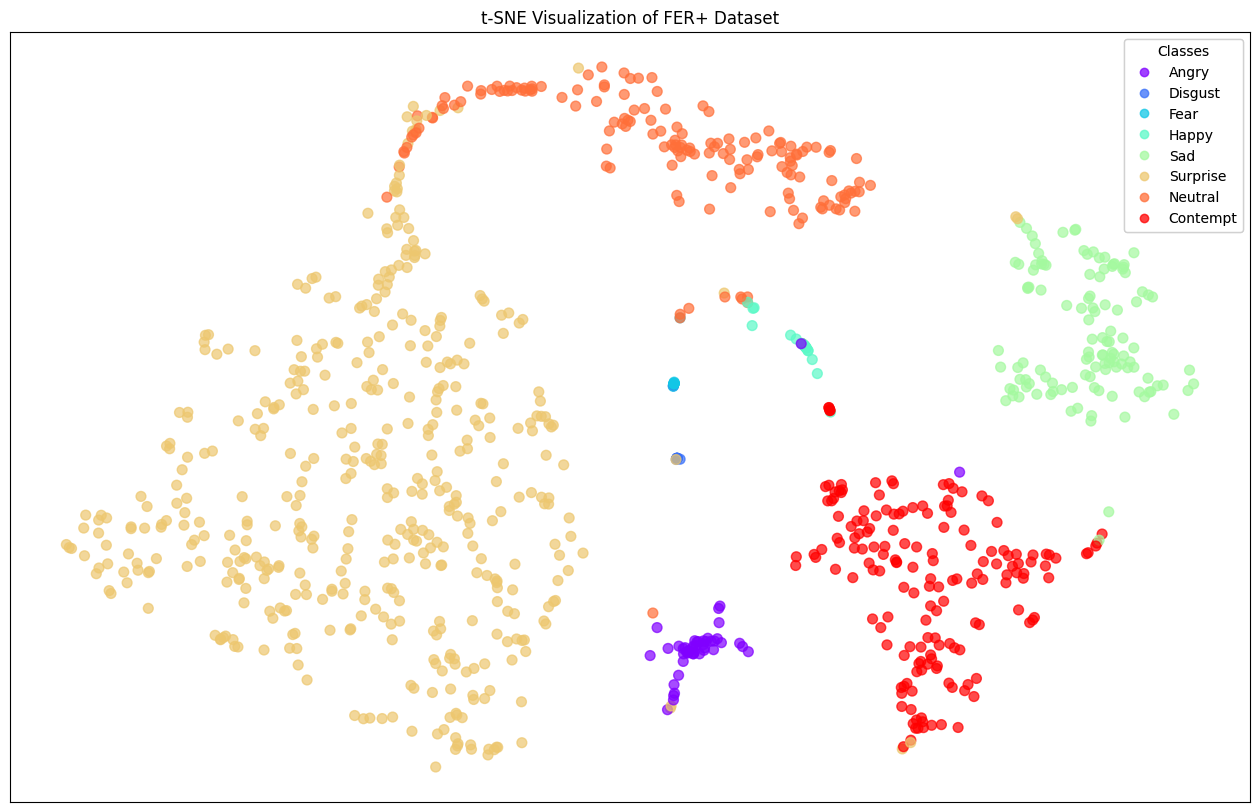

In [5]:
# Map class indices to class names
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral', 'Contempt']

# Apply t-SNE to features
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=0)
X_tsne = tsne.fit_transform(features)

# Plot results
fig, ax = plt.subplots(figsize=(16,10))
scatter = ax.scatter(
    x=X_tsne[:,0],
    y=X_tsne[:,1],
    c=labels,
    cmap=plt.cm.get_cmap("rainbow", 8),
    alpha=0.7,
    s=50,
)
handles, _ = scatter.legend_elements(num=8)
legend1 = ax.legend(handles, class_names, loc="upper right", title="Classes")
ax.add_artist(legend1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('t-SNE Visualization of FER+ Dataset')
plt.show()
fig.savefig('Train.png')

### Test Data

In [6]:
# Define transforms for the dataset
transform = transforms.Compose([
    transforms.Resize(224), 
    transforms.CenterCrop(224), 
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load the dataset
test_data = datasets.ImageFolder('./datasets/fer2013/FERPlus/test', transform=transform)

# Create a subset of the dataset containing 1000 samples
np.random.seed(42)
indices = torch.randperm(len(test_data))[:1000]
subset = Subset(test_data, indices)

# Create a dataloader for the dataset
batch_size = 64
test_loader = DataLoader(subset, batch_size=batch_size, shuffle=False)

In [7]:
# Extract features from the model
features = []
labels = []
with torch.no_grad():
    for batch, (images, targets) in enumerate(test_loader):
        # Move the data to teh GPU
        images, targets = images.to(device), targets.to(device)
        
        # Pass the images through the model and extract the features
        outputs = model(images)
        features.append(outputs[0].cpu().numpy())
        labels.append(targets.cpu().numpy())
features = np.vstack(features)
labels = np.hstack(labels)

C:\Users\Karth\AppData\Local\Temp\ipykernel_7456\2072284923.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap("plasma", 8),


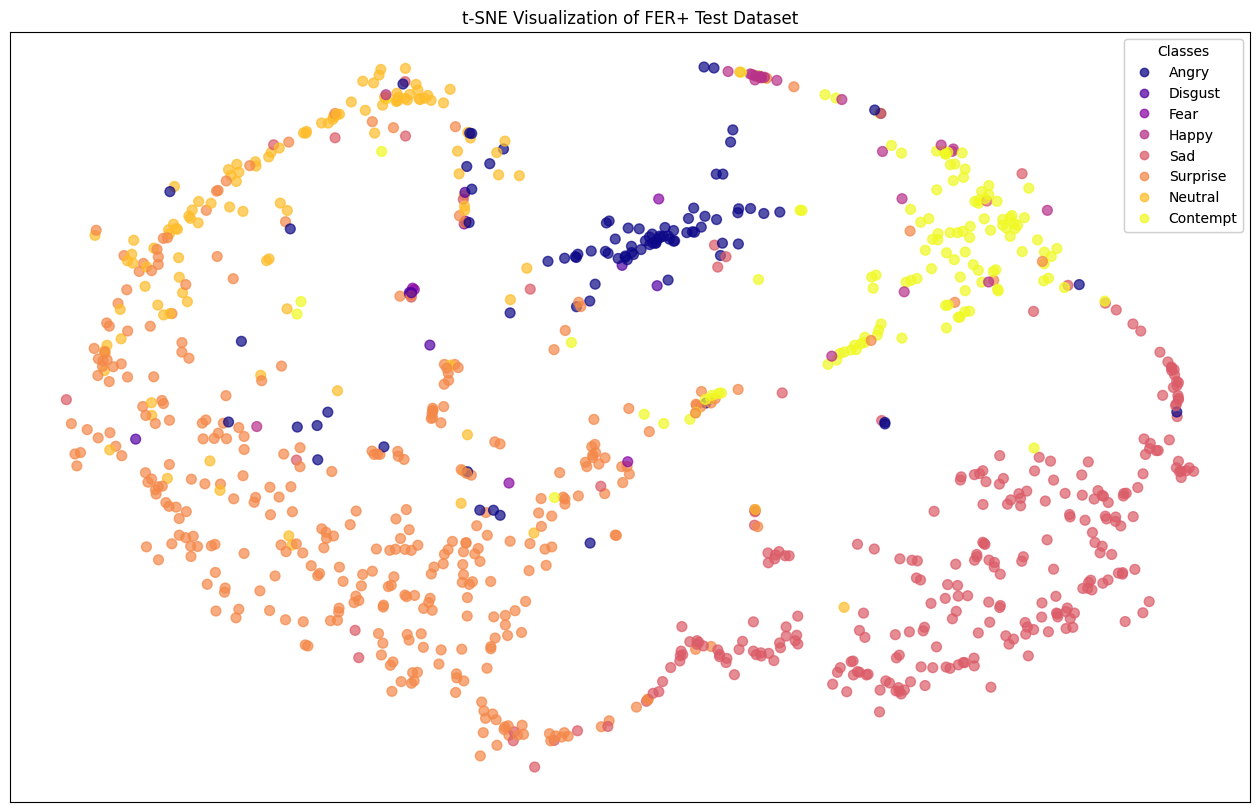

In [8]:
# Map class indices to class names
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral', 'Contempt']

# Apply t-SNE to features
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=0)
X_tsne = tsne.fit_transform(features)

# Plot results
fig, ax = plt.subplots(figsize=(16,10))
scatter = ax.scatter(
    x=X_tsne[:,0],
    y=X_tsne[:,1],
    c=labels,
    cmap=plt.cm.get_cmap("plasma", 8),
    alpha=0.7,
    s=50,
)
handles, _ = scatter.legend_elements(num=8)
legend1 = ax.legend(handles, class_names, loc="upper right", title="Classes")
ax.add_artist(legend1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('t-SNE Visualization of FER+ Test Dataset')
plt.show()
fig.savefig('Test.png')

# t-SNE plot on Pre-trained Model

### Train Dataset

In [1]:
# Import Statements
import torch
from torchvision import transforms, datasets
import numpy as np
from torch.utils.data import DataLoader, Subset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from models.backbone import ResNet_18

In [2]:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} device")

Using cuda device


In [3]:
# Define transforms for the dataset
transform = transforms.Compose([
    transforms.Resize(224), 
    transforms.CenterCrop(224), 
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load the dataset
data = datasets.ImageFolder('./datasets/fer2013/FERPlus/train', transform=transform)

# Create a subset of the dataset containing 1000 samples
np.random.seed(42)
indices = torch.randperm(len(data))[:1000]
subset = Subset(data, indices)

# Create a dataloader for the dataset
batch_size = 64
data_loader = DataLoader(subset, batch_size=batch_size, shuffle=True)

In [4]:
# Load the pre-trained model
model_dict = torch.load('./save/SupCon/fer2013_models/Pre-Trained/last.pth')
model = ResNet_18(num_classes=8)
model.load_state_dict(model_dict['model'])
model.to(device=device)

# Set the model to evaluation mode
model.eval()

# Extract features from the model
features = []
labels = []
with torch.no_grad():
    for batch, (images, targets) in enumerate(data_loader):
        # Move the data to teh GPU
        images, targets = images.to(device), targets.to(device)
        
        # Pass the images through the model and extract the features
        outputs = model(images)
        features.append(outputs[0].cpu().numpy())
        labels.append(targets.cpu().numpy())
features = np.vstack(features)
labels = np.hstack(labels)

C:\Users\Karth\AppData\Local\Temp\ipykernel_19028\2900941492.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap("rainbow", 8),


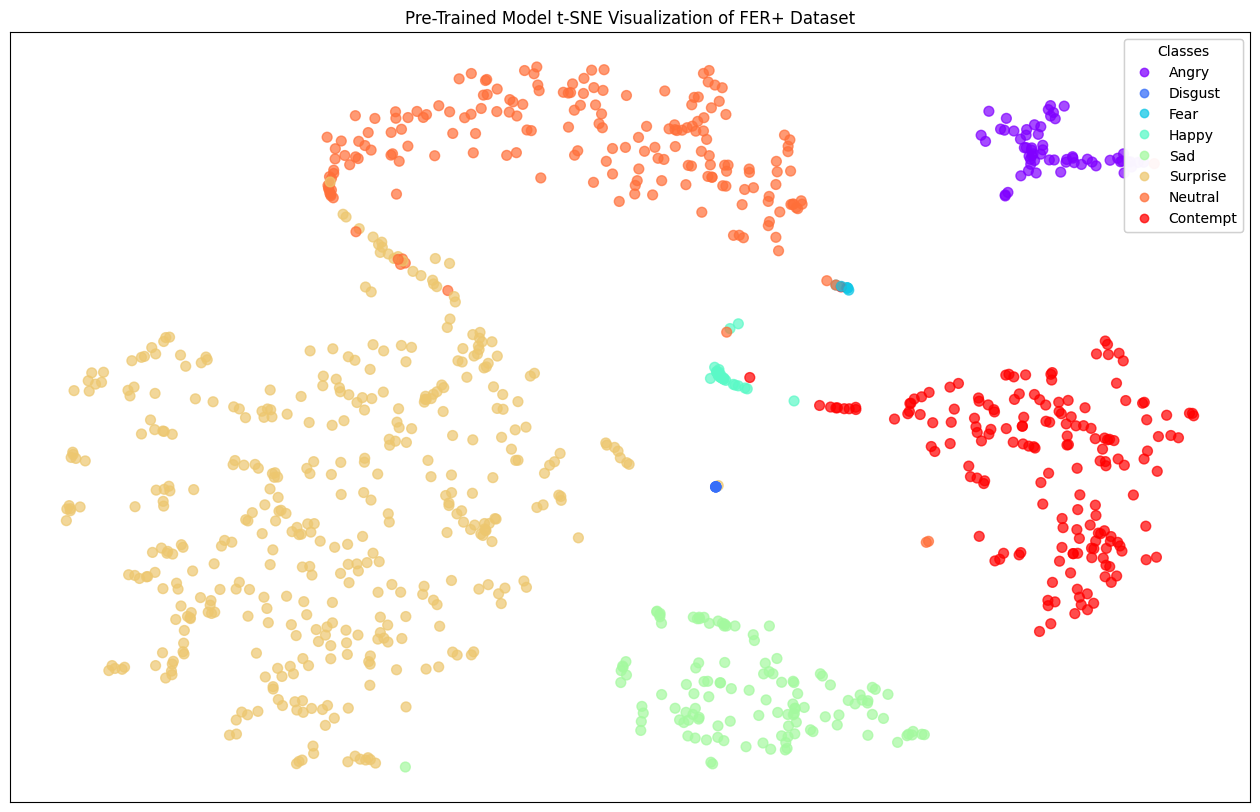

In [6]:
# Map class indices to class names
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral', 'Contempt']

# Apply t-SNE to features
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=0)
X_tsne = tsne.fit_transform(features)

# Plot results
fig, ax = plt.subplots(figsize=(16,10))
scatter = ax.scatter(
    x=X_tsne[:,0],
    y=X_tsne[:,1],
    c=labels,
    cmap=plt.cm.get_cmap("rainbow", 8),
    alpha=0.7,
    s=50,
)
handles, _ = scatter.legend_elements(num=8)
legend1 = ax.legend(handles, class_names, loc="upper right", title="Classes")
ax.add_artist(legend1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Pre-Trained Model t-SNE Visualization of FER+ Dataset')
plt.show()
fig.savefig('Pre-Train.png')

### Test Dataset

In [7]:
# Define transforms for the dataset
transform = transforms.Compose([
    transforms.Resize(224), 
    transforms.CenterCrop(224), 
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load the dataset
test_data = datasets.ImageFolder('./datasets/fer2013/FERPlus/test', transform=transform)

# Create a subset of the dataset containing 1000 samples
np.random.seed(42)
indices = torch.randperm(len(test_data))[:1000]
subset = Subset(test_data, indices)

# Create a dataloader for the dataset
batch_size = 64
test_loader = DataLoader(subset, batch_size=batch_size, shuffle=False)

In [8]:
# Extract features from the model
features = []
labels = []
with torch.no_grad():
    for batch, (images, targets) in enumerate(test_loader):
        # Move the data to teh GPU
        images, targets = images.to(device), targets.to(device)
        
        # Pass the images through the model and extract the features
        outputs = model(images)
        features.append(outputs[0].cpu().numpy())
        labels.append(targets.cpu().numpy())
features = np.vstack(features)
labels = np.hstack(labels)

C:\Users\Karth\AppData\Local\Temp\ipykernel_19028\93465368.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap("plasma", 8),


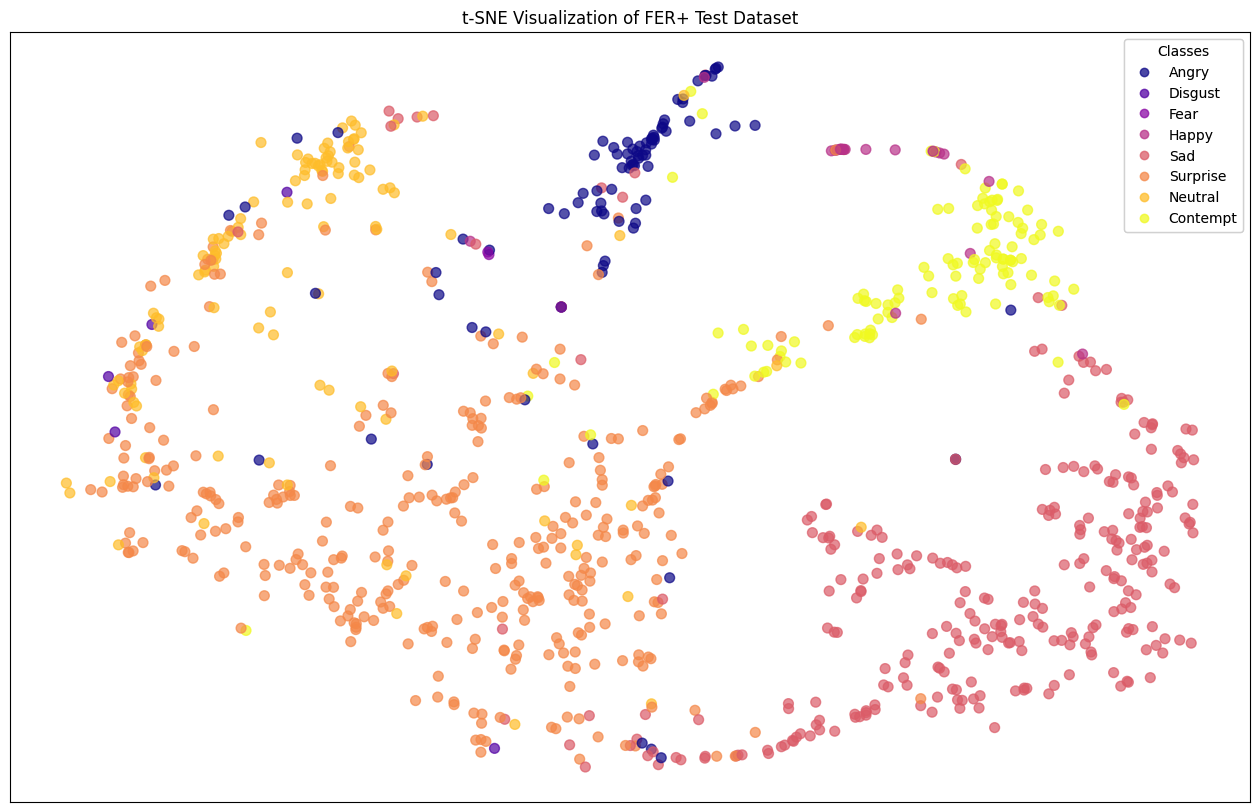

In [9]:
# Map class indices to class names
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral', 'Contempt']

# Apply t-SNE to features
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=0)
X_tsne = tsne.fit_transform(features)

# Plot results
fig, ax = plt.subplots(figsize=(16,10))
scatter = ax.scatter(
    x=X_tsne[:,0],
    y=X_tsne[:,1],
    c=labels,
    cmap=plt.cm.get_cmap("plasma", 8),
    alpha=0.7,
    s=50,
)
handles, _ = scatter.legend_elements(num=8)
legend1 = ax.legend(handles, class_names, loc="upper right", title="Classes")
ax.add_artist(legend1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('t-SNE Visualization of FER+ Test Dataset')
plt.show()
fig.savefig('Pre-Test.png')